In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'high_diamond_ranked_10min.csv')

In [3]:
print(data)

          gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1                  0          5      

In [4]:
data=data.drop('gameId',axis=1)

In [5]:
print(data.columns)

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


In [6]:
y=data['blueWins']

In [7]:
X=data.drop(['blueWins','blueEliteMonsters','blueHeralds','blueTotalGold','blueTotalExperience',
         'blueTotalJungleMinionsKilled','blueGoldDiff','blueExperienceDiff','blueTotalMinionsKilled',
         'blueGoldPerMin','redWardsPlaced', 'redWardsDestroyed','redFirstBlood',
         'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters','redHeralds','redTotalGold', 'redTotalExperience','redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff','redGoldPerMin'],axis=1)

In [8]:
print(X)

      blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0                  28                   2               1          9   
1                  12                   1               0          5   
2                  15                   0               0          7   
3                  43                   1               0          4   
4                  75                   4               0          6   
...               ...                 ...             ...        ...   
9874               17                   2               1          7   
9875               54                   0               0          6   
9876               23                   1               0          6   
9877               14                   4               1          2   
9878               18                   0               1          6   

      blueDeaths  blueAssists  blueDragons  blueTowersDestroyed  blueAvgLevel  \
0              6           11            0            

In [9]:
X['CSPerdiff']=X['blueCSPerMin']-X['redCSPerMin']
X['avgleveldiff']=X['blueAvgLevel']-X['redAvgLevel']

In [10]:
X=X.drop(['blueCSPerMin','redCSPerMin','blueAvgLevel','redAvgLevel'],axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler#수치형
from sklearn.preprocessing import LabelEncoder#범주형
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,make_scorer#정확도,민감도등
from sklearn.metrics import roc_curve #roc곡선그리기#최적화
from sklearn.model_selection import cross_validate #교차타당도
from sklearn.pipeline import make_pipeline#파이프라인구축
from sklearn.model_selection import learning_curve#학습곡선,검증곡선
from sklearn.model_selection import GridSearchCV #하이퍼파라미티튜닝

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [12]:
X_train,X_test,y_train,y_test=\
    train_test_split(X,y,
    test_size=0.4,
    train_size=0.6,
    random_state=12354,
    shuffle=True)



#x 데이터들을 표준화실시

In [13]:
tree=DecisionTreeClassifier(criterion='gini',splitter='best')
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
confmat1=pd.DataFrame(confusion_matrix(y_test,y_pred),
index=['true[0]','true[1]'],
columns=['predict[0]','predict[1]'])
#메트릭스 형태로 현재모델의 평가
print(confmat1)
print(classification_report(y_test,y_pred))

         predict[0]  predict[1]
true[0]        1230         695
true[1]         811        1216
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      1925
           1       0.64      0.60      0.62      2027

    accuracy                           0.62      3952
   macro avg       0.62      0.62      0.62      3952
weighted avg       0.62      0.62      0.62      3952



In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

kfold=StratifiedKFold(n_splits=10)
repeart=RepeatedStratifiedKFold(n_splits=10,n_repeats=5)


pipe_tree=make_pipeline(DecisionTreeClassifier())







param_range1=[1,2,3,4,5,6,7,8,9,10]#수정
param_range2=[10,20,30,40,50,60]#수정
param_range3=np.linspace(0.1e-5,0.1,100)


param_grid=[{'decisiontreeclassifier__max_depth':param_range1,#수정
'decisiontreeclassifier__min_samples_leaf':param_range2,#수정,
'decisiontreeclassifier__min_impurity_decrease':param_range3}]

gs=GridSearchCV(estimator=pipe_tree,#수정
param_grid=param_grid,
scoring='accuracy',
cv=kfold,n_jobs=-1)
#하이퍼파라메터를 동시에 두고 최적화 패키지를 찾아줌
gs=gs.fit(X_train,y_train)

#print(gs.best_score_)#
print(gs.best_params_)#가장 나은 가치지기수가장 적합한 최소 샘플 갯수

#모델최적화검정

best_tree=gs.best_estimator_
clf=best_tree.fit(X_train,y_train)
y_pred_tree=best_tree.predict(X_test)

confmat2=pd.DataFrame(confusion_matrix(y_test,y_pred_tree),
index=['True[0]','True[1]'],
columns=['Predict[0]','predict[1]'])
print(confmat2)

{'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__min_impurity_decrease': 0.001011090909090909, 'decisiontreeclassifier__min_samples_leaf': 60}
         Predict[0]  predict[1]
True[0]        1334         591
True[1]         581        1446


In [15]:
print(classification_report(y_test,y_pred_tree))
print(pipe_tree.get_params().keys())

              precision    recall  f1-score   support

           0       0.70      0.69      0.69      1925
           1       0.71      0.71      0.71      2027

    accuracy                           0.70      3952
   macro avg       0.70      0.70      0.70      3952
weighted avg       0.70      0.70      0.70      3952

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])


In [17]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import pydotplus
import os
from IPython.display import Image #cart tree그림
clf=DecisionTreeClassifier(max_depth= 5,min_samples_leaf= 30,
                          criterion='gini')
clf=clf.fit(X_train,y_train)

os.environ['PATH']+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'
feature_names=X.columns.tolist()#x의컬럼을저장
target_name=np.array(['no','yes'])

dot_data=export_graphviz(clf,
filled=True,
rounded=True,
class_names=target_name,
feature_names=feature_names,
                        out_file=None)

graph=pydotplus.graph_from_dot_data(dot_data)#그래프로 나타냄
graph.write_png('롤 영어버전.png')

True

In [20]:
print(data)

      blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0            0               28                   2               1   
1            0               12                   1               0   
2            0               15                   0               0   
3            0               43                   1               0   
4            0               75                   4               0   
...        ...              ...                 ...             ...   
9874         1               17                   2               1   
9875         1               54                   0               0   
9876         0               23                   1               0   
9877         0               14                   4               1   
9878         1               18                   0               1   

      blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0             9           6           11                  0            

In [21]:
train_sizes,train_scores,test_scores=\
    learning_curve(estimator=best_tree,#수정
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    n_jobs=-1,
    cv=kfold)

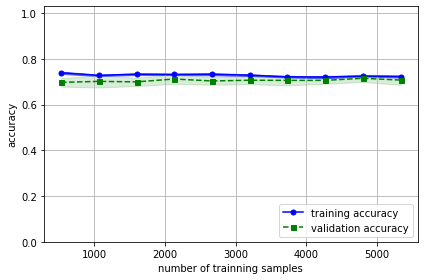

In [22]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)

test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes,train_mean,
color='blue',marker='o',
markersize=5,label='training accuracy')

plt.fill_between(train_sizes,
train_mean+train_std,
train_mean-train_std,
alpha=0.5,color='blue')

plt.plot(train_sizes,test_mean,
color='green',linestyle='--',
marker='s',markersize=5,
label='validation accuracy')
plt.fill_between(train_sizes,
test_mean+test_std,
test_mean-test_std,
alpha=0.15,color='green')

plt.grid()
plt.xlabel('number of trainning samples')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim([0,1.03])#수정  y값의 범위
plt.tight_layout()
plt.show()

3326    0
5474    0
3203    1
4329    0
7489    1
       ..
7729    1
5333    1
4731    1
3370    0
22      0
Name: blueWins, Length: 5927, dtype: int64
